<a href="https://colab.research.google.com/github/Rajarshi1001/dl_tutorial/blob/main/CIFAR10_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
from tensorflow.keras import datasets
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

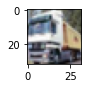

In [ ]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
plot_sample(1)

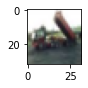

In [ ]:
plot_sample(2)

In [ ]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255
y_train_categorical=keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test_categorical=keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=50)
#I have decreased the epoch number because it takes a great deal of time , so dont mind about the accuracy...

In [ ]:
p=model.predict(X_test_scaled)[0]
max_prob=np.argmax(p)
print(classes[max_prob])

In [ ]:
classes[y_test[0][0]]

In [ ]:
model.evaluate(X_test_scaled, y_test_categorical)

In [ ]:
# testing with cpu
def get_modelcpu():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
# testing with gpu
def get_modelgpu():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_modelcpu()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_modelgpu()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)